In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

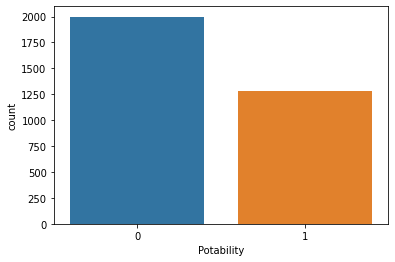

In [3]:
sns.countplot(data["Potability"])

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

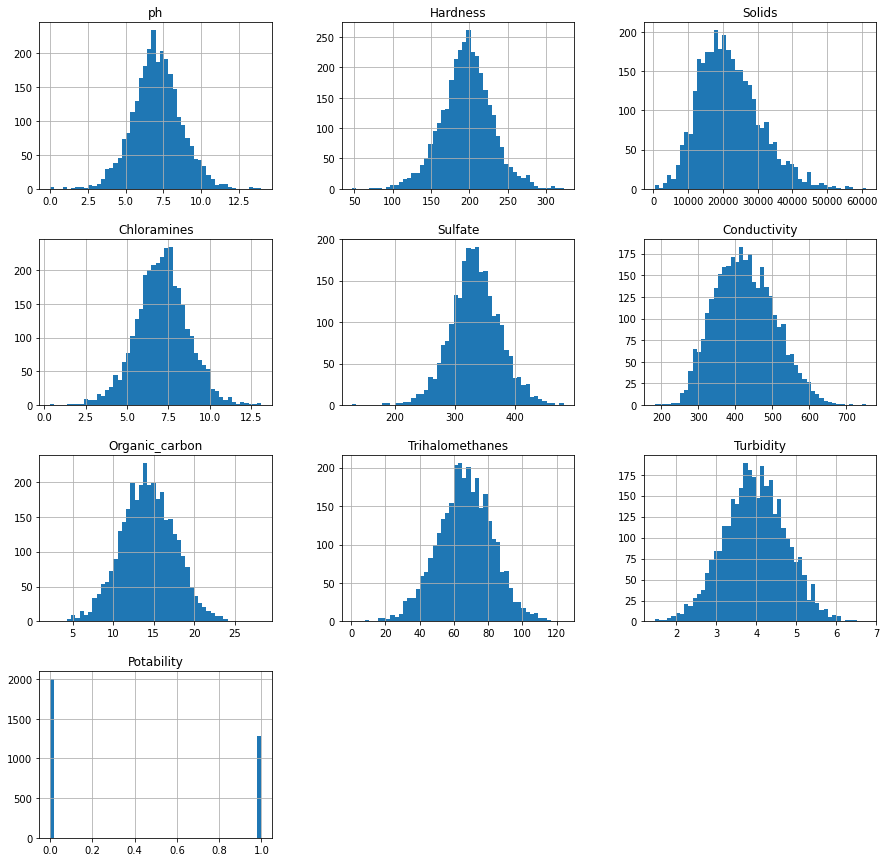

In [4]:
data.hist(figsize=(15,15),bins=50)

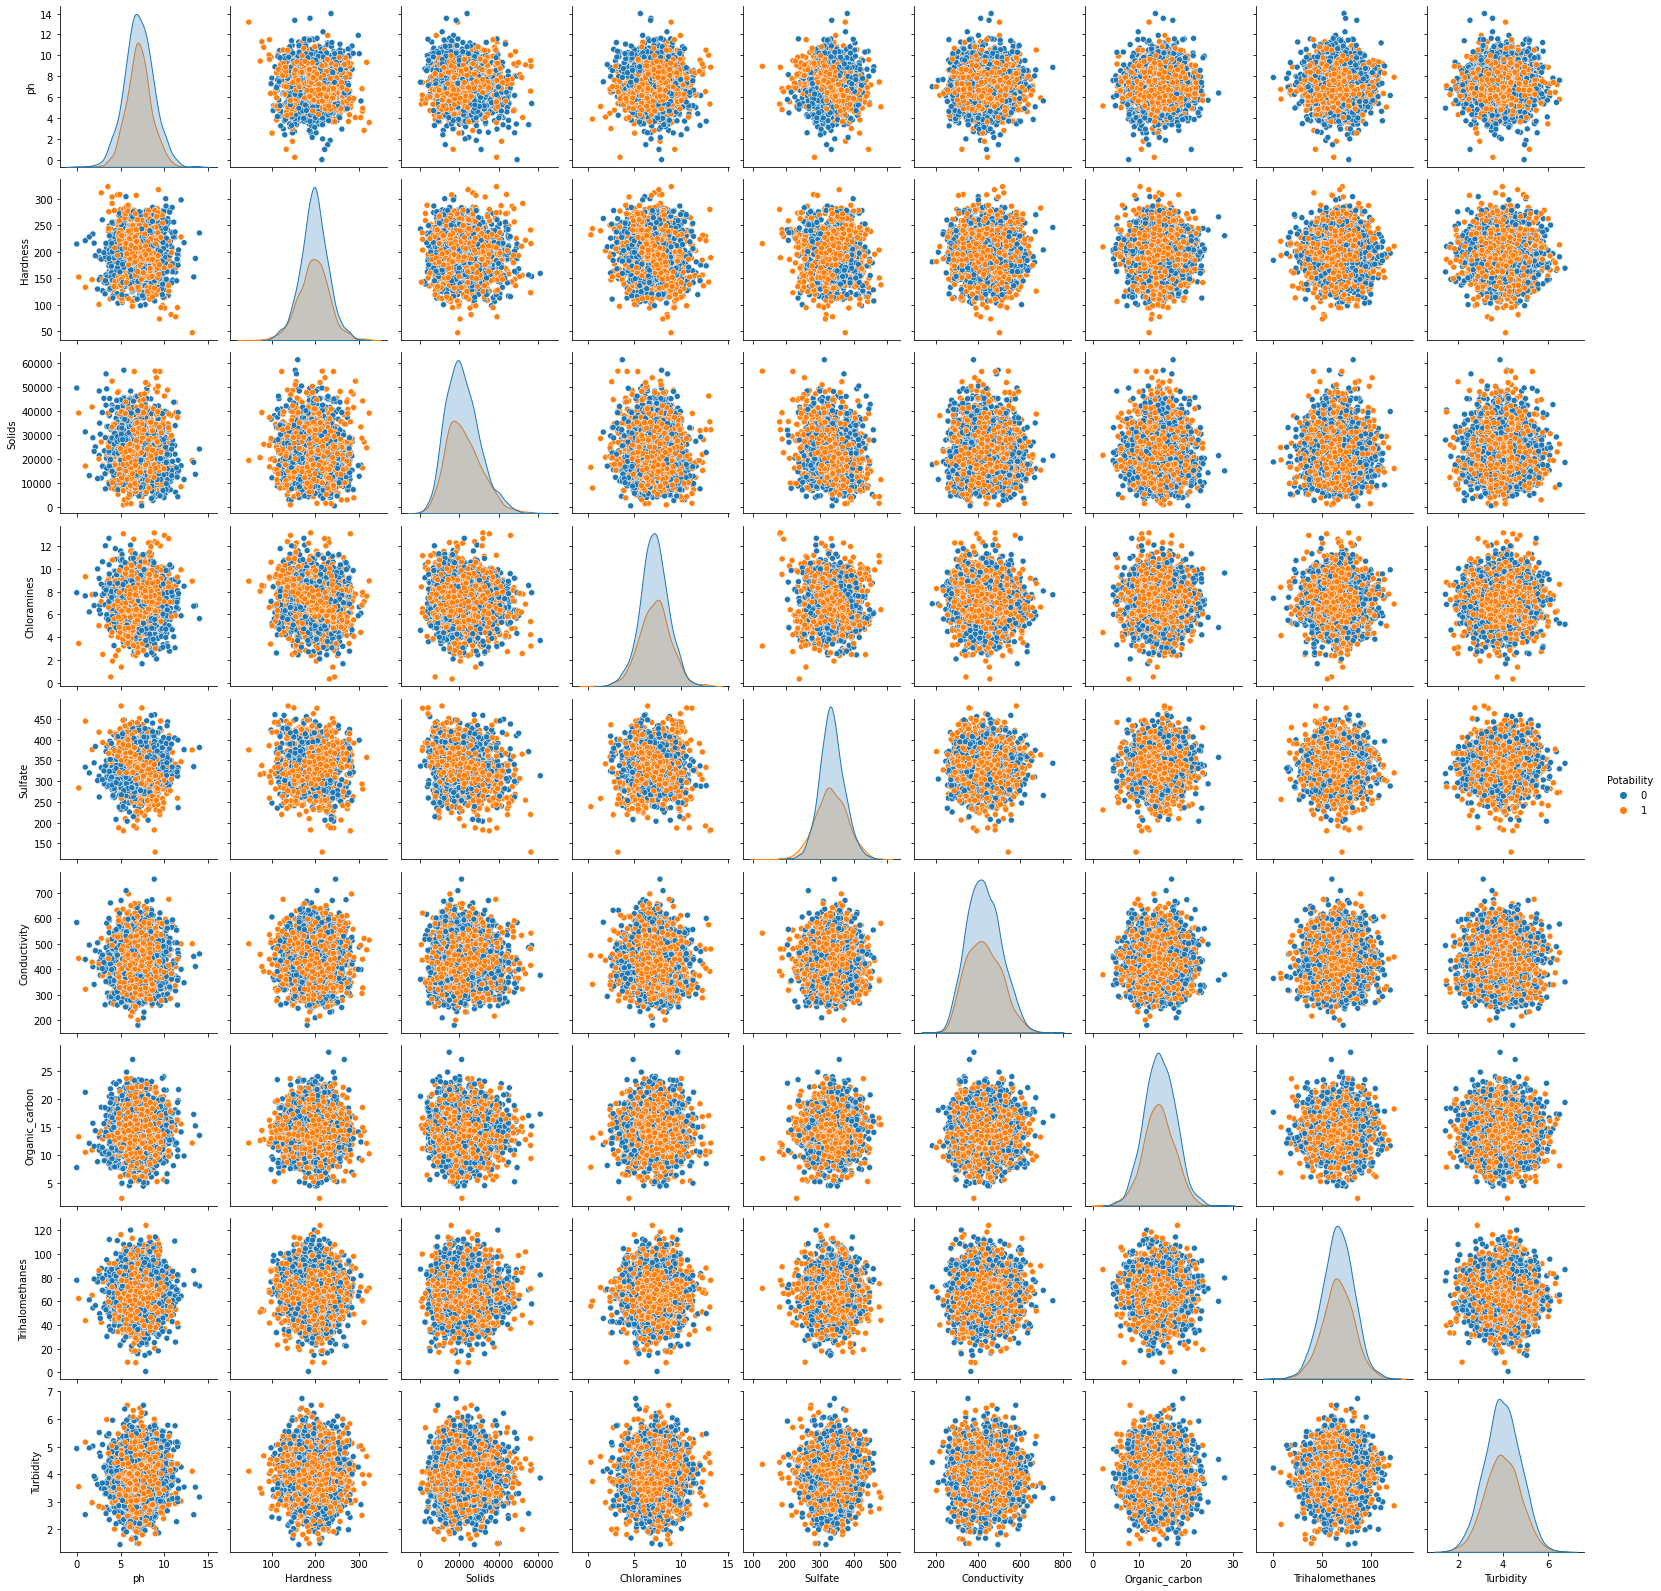

In [5]:
sns.pairplot(data,hue="Potability")

In [6]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<AxesSubplot:>

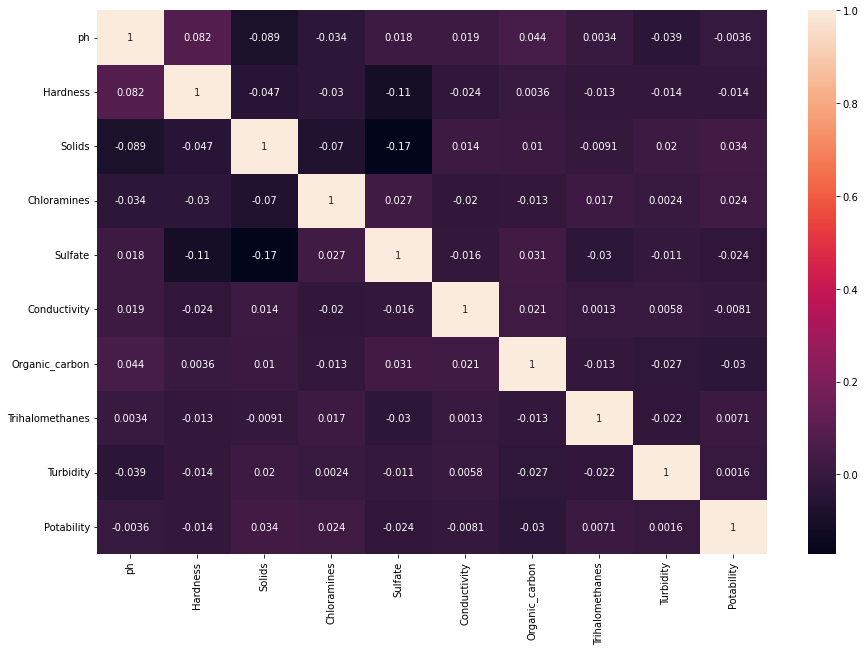

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

# Preprocessing

In [8]:
X = data.drop("Potability",axis=1)
Y = data.Potability.values

In [9]:
X.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

### Missing Values

In [10]:
missing = SimpleImputer(missing_values=np.nan,strategy="mean")
X = missing.fit_transform(X)

### Scaling
### Standard Scaler

In [11]:
SS = StandardScaler()
X = SS.fit_transform(X)

### balance
### SMOTETomek

In [12]:
ST = SMOTETomek(random_state=0)
X,Y = ST.fit_resample(X,Y)

# Model

In [13]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=222)

### KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=2,weights="distance",n_jobs=-1)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [15]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       367
           1       0.76      0.89      0.82       388

    accuracy                           0.80       755
   macro avg       0.81      0.80      0.80       755
weighted avg       0.81      0.80      0.80       755



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


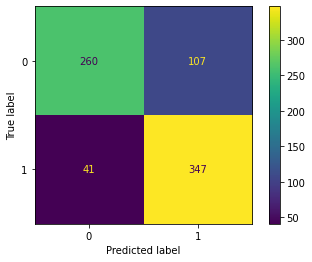

In [16]:
metrics.plot_confusion_matrix(knn,x_test,y_test)

### SVC

In [17]:
svc = SVC(kernel="rbf",random_state=300)
svc.fit(x_train,y_train)
predict_svm = svc.predict(x_test)

In [18]:
print(metrics.classification_report(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       367
           1       0.71      0.65      0.68       388

    accuracy                           0.68       755
   macro avg       0.68      0.68      0.68       755
weighted avg       0.68      0.68      0.68       755



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


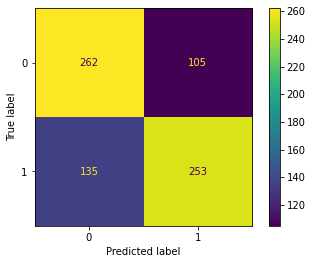

In [19]:
metrics.plot_confusion_matrix(svc,x_test,y_test)

### RandomForestClassifier

In [20]:
RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=5)
RF.fit(x_train,y_train)
predict_RF = RF.predict(x_test)

In [21]:
print(metrics.classification_report(y_test,predict_RF))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       367
           1       0.78      0.75      0.76       388

    accuracy                           0.76       755
   macro avg       0.76      0.76      0.76       755
weighted avg       0.76      0.76      0.76       755



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


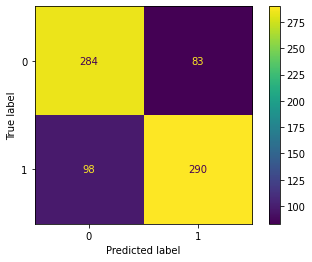

In [22]:
metrics.plot_confusion_matrix(RF,x_test,y_test)

### GBoostingClassifier

In [23]:
Gboost = GradientBoostingClassifier(n_estimators=500,learning_rate=0.20,subsample=0.9,min_samples_split=20,max_depth=10,random_state=10)
Gboost.fit(x_train,y_train)
predict_gb = Gboost.predict(x_test)

In [24]:
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       367
           1       0.78      0.73      0.76       388

    accuracy                           0.76       755
   macro avg       0.76      0.76      0.76       755
weighted avg       0.76      0.76      0.76       755



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


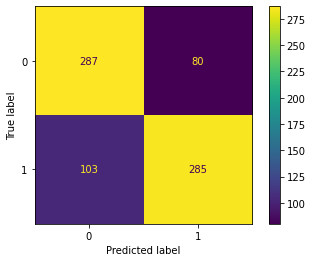

In [25]:
metrics.plot_confusion_matrix(Gboost,x_test,y_test)

## CatBoostClassifier

In [26]:
catboost = CatBoostClassifier(iterations=200,learning_rate=0.19,eval_metric="Accuracy",task_type="GPU",random_state=0)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 0.6359722	test: 0.5814570	best: 0.5814570 (0)	total: 10ms	remaining: 1.99s
1:	learn: 0.6535277	test: 0.5960265	best: 0.5960265 (1)	total: 19.7ms	remaining: 1.95s
2:	learn: 0.6796953	test: 0.6701987	best: 0.6701987 (2)	total: 28ms	remaining: 1.84s
3:	learn: 0.6886386	test: 0.6556291	best: 0.6701987 (2)	total: 36.2ms	remaining: 1.77s
4:	learn: 0.6942696	test: 0.6596026	best: 0.6701987 (2)	total: 44.6ms	remaining: 1.74s
5:	learn: 0.7128188	test: 0.6688742	best: 0.6701987 (2)	total: 53.1ms	remaining: 1.72s
6:	learn: 0.7184498	test: 0.6569536	best: 0.6701987 (2)	total: 61.6ms	remaining: 1.7s
7:	learn: 0.7121563	test: 0.6410596	best: 0.6701987 (2)	total: 69.8ms	remaining: 1.67s
8:	learn: 0.7287181	test: 0.6582781	best: 0.6701987 (2)	total: 78.1ms	remaining: 1.66s
9:	learn: 0.7310368	test: 0.6516556	best: 0.6701987 (2)	total: 86.3ms	remaining: 1.64s
10:	learn: 0.7369990	test: 0.6516556	best: 0.6701987 (2)	total: 94.5ms	remaining: 1.62s
11:	learn: 0.7426300	test: 0.6715232	best: 0.67

In [27]:
catboost.best_score_

{'learn': {'Accuracy': 0.9923815833057303, 'Logloss': 0.1664205414050855},
 'validation': {'Accuracy': 0.7549668874172185, 'Logloss': 0.5460885357383071}}

In [28]:
predict_cat = catboost.predict(x_test)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


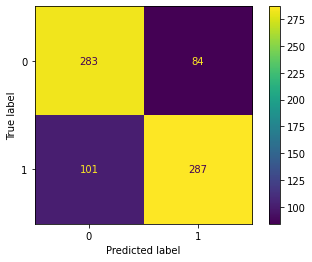

In [29]:
metrics.plot_confusion_matrix(catboost,x_test,y_test)

In [30]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn),'Recall': metrics.recall_score(y_test,predict_knn),'F1-score': metrics.f1_score(y_test,predict_knn)},
       {"Algorithm":"SVM", 'Accuracy': metrics.accuracy_score(y_test,predict_svm),'Precision': metrics.precision_score(y_test,predict_svm),'Recall': metrics.recall_score(y_test,predict_svm),'F1-score': metrics.f1_score(y_test,predict_svm)},
        {"Algorithm":"RandomForest",'Accuracy': metrics.accuracy_score(y_test,predict_RF),'Precision': metrics.precision_score(y_test,predict_RF),'Recall': metrics.recall_score(y_test,predict_RF),'F1-score': metrics.f1_score(y_test,predict_RF)},
        {"Algorithm":"Gboost",'Accuracy': metrics.accuracy_score(y_test,predict_gb),'Precision': metrics.precision_score(y_test,predict_gb),'Recall': metrics.recall_score(y_test,predict_gb),'F1-score': metrics.f1_score(y_test,predict_gb)},
        {"Algorithm":"Catboost",'Accuracy': metrics.accuracy_score(y_test,predict_cat),'Precision': metrics.precision_score(y_test,predict_cat),'Recall': metrics.recall_score(y_test,predict_cat),'F1-score': metrics.f1_score(y_test,predict_cat)}
       ] 

In [31]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.803974,0.764317,0.894330,0.824228
1,SVM,0.682119,0.706704,0.652062,0.678284
2,RandomForest,0.760265,0.777480,0.747423,0.762155
3,Gboost,0.757616,0.780822,0.734536,0.756972
4,Catboost,0.754967,0.773585,0.739691,0.756258
